<a href="https://colab.research.google.com/github/sabaakram539/data_analysis_projects/blob/main/2_Covid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Worldometer Covid Data Analysis
We have taken the below mentioned csv data set from the kaggle. We will analyse the data using the pandas dataframe and matplotlib. Here we go. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('worldometer_coronavirus_summary_data.csv')
data.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,147473,6736.0,98073.0,42664.0,1124.0,3699,169.0,707244.0,17739.0,39869084
1,Albania,Europe,133081,2457.0,130222.0,402.0,3.0,46299,855.0,916777.0,318945.0,2874408
2,Algeria,Africa,171392,4254.0,115276.0,51862.0,47.0,3834,95.0,230861.0,5164.0,44701619
3,Andorra,Europe,14678,128.0,14210.0,340.0,NaN,189643,1654.0,193595.0,2501292.0,77398
4,Angola,Africa,42646,1008.0,36708.0,4930.0,8.0,1256,30.0,681443.0,20065.0,33961015


In [ ]:
data.rename(columns={'serious_or_critical':'critical','total_cases_per_1m_population':'cases_per_1m'
,'total_deaths_per_1m_population':'deaths_per_1m','total_tests_per_1m_population':'tests_per_1m'},inplace=True)

## Preprocessing
> Handling null values

In [ ]:
data.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,critical,cases_per_1m,deaths_per_1m,total_tests,tests_per_1m,population
0,Afghanistan,Asia,147473,6736.0,98073.0,42664.0,1124.0,3699,169.0,707244.0,17739.0,39869084
1,Albania,Europe,133081,2457.0,130222.0,402.0,3.0,46299,855.0,916777.0,318945.0,2874408
2,Algeria,Africa,171392,4254.0,115276.0,51862.0,47.0,3834,95.0,230861.0,5164.0,44701619
3,Andorra,Europe,14678,128.0,14210.0,340.0,NaN,189643,1654.0,193595.0,2501292.0,77398
4,Angola,Africa,42646,1008.0,36708.0,4930.0,8.0,1256,30.0,681443.0,20065.0,33961015


In [ ]:
data.shape

(220, 12)

In [ ]:
data.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,critical,cases_per_1m,deaths_per_1m,total_tests,tests_per_1m,population
0,Afghanistan,Asia,147473,6736.0,98073.0,42664.0,1124.0,3699,169.0,707244.0,17739.0,39869084
1,Albania,Europe,133081,2457.0,130222.0,402.0,3.0,46299,855.0,916777.0,318945.0,2874408
2,Algeria,Africa,171392,4254.0,115276.0,51862.0,47.0,3834,95.0,230861.0,5164.0,44701619
3,Andorra,Europe,14678,128.0,14210.0,340.0,NaN,189643,1654.0,193595.0,2501292.0,77398
4,Angola,Africa,42646,1008.0,36708.0,4930.0,8.0,1256,30.0,681443.0,20065.0,33961015


In [ ]:
data.count() # not null values.

country            220
continent          220
total_confirmed    220
total_deaths       207
total_recovered    219
active_cases       219
critical           146
cases_per_1m       220
deaths_per_1m      204
total_tests        210
tests_per_1m       210
population         220
dtype: int64

In [ ]:
data=data.interpolate(method="linear")

In [ ]:
data.shape

(220, 12)

In [ ]:
data.count()

country            220
continent          220
total_confirmed    220
total_deaths       220
total_recovered    220
active_cases       220
critical           220
cases_per_1m       220
deaths_per_1m      220
total_tests        220
tests_per_1m       220
population         220
dtype: int64

In [ ]:
data.isnull().sum()

country            0
continent          0
total_confirmed    0
total_deaths       0
total_recovered    0
active_cases       0
critical           0
cases_per_1m       0
deaths_per_1m      0
total_tests        0
tests_per_1m       0
population         0
dtype: int64

> Other measures

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          220 non-null    object 
 1   continent        220 non-null    object 
 2   total_confirmed  220 non-null    int64  
 3   total_deaths     220 non-null    float64
 4   total_recovered  220 non-null    float64
 5   active_cases     220 non-null    float64
 6   critical         220 non-null    float64
 7   cases_per_1m     220 non-null    int64  
 8   deaths_per_1m    220 non-null    float64
 9   total_tests      220 non-null    float64
 10  tests_per_1m     220 non-null    float64
 11  population       220 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 20.8+ KB


In [ ]:
data.total_deaths=data.total_deaths.astype(int)
data.total_recovered=data.total_recovered.astype(int)
data.total_recovered=data.total_recovered.astype(int)
data.active_cases=data.active_cases.astype(int)
data.critical=data.critical.astype(int)
data.deaths_per_1m=data.deaths_per_1m.astype(int)
data.total_tests=data.total_tests.astype(int)
data.tests_per_1m=data.tests_per_1m.astype(int)

In [ ]:
data.describe()

,total_confirmed,total_deaths,total_recovered,active_cases,critical,cases_per_1m,deaths_per_1m,total_tests,tests_per_1m,population
count,2.200000e+02,220.000000,2.200000e+02,2.200000e+02,220.000000,220.000000,220.000000,2.200000e+02,2.200000e+02,2.200000e+02
mean,9.021924e+05,19922.345455,8.112964e+05,6.750614e+04,597.950000,39901.322727,695.727273,1.380974e+07,8.932133e+05,3.563921e+07
std,3.598470e+06,69859.197783,3.244071e+06,3.860181e+05,1498.901553,42102.158641,827.174620,5.355192e+07,1.615497e+06,1.402212e+08
min,1.000000e+00,1.000000,1.000000e+00,-1.489000e+03,1.000000,9.000000,2.000000,1.408000e+03,2.882000e+03,8.030000e+02
25%,7.896500e+03,148.750000,5.361500e+03,4.057500e+02,11.000000,3090.500000,71.750000,1.776435e+05,9.371250e+04,6.347295e+05
50%,7.733750e+04,1379.500000,6.642950e+04,3.491500e+03,71.000000,26154.500000,383.000000,1.295610e+06,3.358005e+05,6.580660e+06
75%,4.099940e+05,7852.000000,3.828102e+05,2.107600e+04,360.250000,68381.000000,1044.500000,6.607607e+06,1.012962e+06,2.418337e+07
max,3.573397e+07,629290.000000,3.081287e+07,5.438593e+06,9375.000000,189643.000000,5865.000000,5.295773e+08,1.311142e+07,1.439324e+09


In [ ]:
data.head(10)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,critical,cases_per_1m,deaths_per_1m,total_tests,tests_per_1m,population
0,Afghanistan,Asia,147473,6736,98073,42664,1124,3699,169,707244,17739,39869084
1,Albania,Europe,133081,2457,130222,402,3,46299,855,916777,318945,2874408
2,Algeria,Africa,171392,4254,115276,51862,47,3834,95,230861,5164,44701619
3,Andorra,Europe,14678,128,14210,340,27,189643,1654,193595,2501292,77398
4,Angola,Africa,42646,1008,36708,4930,8,1256,30,681443,20065,33961015
5,Anguilla,North America,113,525,111,2,5,7460,232,31656,2089919,15147
6,Antigua And Barbuda,North America,1303,43,1235,25,3,13188,435,17147,173549,98802
7,Argentina,South America,4929764,105721,4569552,254491,3976,108009,2316,19423553,425562,45642150
8,Armenia,Asia,230110,4614,219864,5632,1995,77499,1554,1340258,451385,2969212
9,Aruba,North America,11730,110,11160,460,14,109367,1026,177885,1658540,107254


Top 10 countries with maximum covid confirmed cases.

In [ ]:
data.groupby('country')['total_confirmed'].sum().sort_values(ascending=False).head(10)

country
USA          35733967
India        31654584
Brazil       19917855
Russia        6265873
France        6127019
UK            5856528
Turkey        5727045
Argentina     4929764
Colombia      4785320
Spain         4447044
Name: total_confirmed, dtype: int64

10 countries with minimum covid confirmed cases.

In [ ]:
data.groupby('country')['total_confirmed'].sum().sort_values(ascending=True).head(10)

country
Micronesia                    1
Saint Helena                  2
Samoa                         3
Marshall Islands              4
Vanuatu                       4
Western Sahara               10
Solomon Islands              20
Montserrat                   21
Holy See                     27
Saint Pierre And Miquelon    28
Name: total_confirmed, dtype: int64

Top 10 countries with maximum covid death cases.

In [ ]:
data.groupby('country')['total_deaths'].sum().sort_values(ascending=False).head(10)

country
USA           629290
Brazil        556370
India         424384
Mexico        240456
Peru          196291
Russia        158563
UK            129654
Italy         128063
Micronesia    123355
Colombia      120723
Name: total_deaths, dtype: int64

Top 10 countries with minimum covid death cases.

In [ ]:
data.groupby('country')['total_deaths'].sum().sort_values(ascending=True).head(10)

country
Montserrat               1
Saint Barthelemy         1
Grenada                  1
Vanuatu                  1
Western Sahara           1
Cayman Islands           2
Bhutan                   2
Faeroe Islands           2
Saint Helena             2
Saint Kitts And Nevis    3
Name: total_deaths, dtype: int64

Top 10 countries with maximum covid recovery cases.

In [ ]:
data.groupby('country')['total_recovered'].sum().sort_values(ascending=False).head(10)

country
India        30812873
USA          29666084
Brazil       18619542
France        5700815
Russia        5608619
Turkey        5454360
Colombia      4578519
Argentina     4569552
UK            4508650
Italy         4134680
Name: total_recovered, dtype: int64

Top 10 countries with minimum covid recovery cases.

In [ ]:
data.groupby('country')['total_recovered'].sum().sort_values(ascending=True).head(10)

country
Micronesia                    1
Saint Helena                  2
Samoa                         3
Vanuatu                       3
Marshall Islands              4
Western Sahara                8
Montserrat                   19
Solomon Islands              20
Saint Pierre And Miquelon    26
Holy See                     27
Name: total_recovered, dtype: int64

In [ ]:
data.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,critical,cases_per_1m,deaths_per_1m,total_tests,tests_per_1m,population
0,Afghanistan,Asia,147473,6736,98073,42664,1124,3699,169,707244,17739,39869084
1,Albania,Europe,133081,2457,130222,402,3,46299,855,916777,318945,2874408
2,Algeria,Africa,171392,4254,115276,51862,47,3834,95,230861,5164,44701619
3,Andorra,Europe,14678,128,14210,340,27,189643,1654,193595,2501292,77398
4,Angola,Africa,42646,1008,36708,4930,8,1256,30,681443,20065,33961015


10 countries with the maximum active cases

In [ ]:
data.groupby('country')['active_cases'].sum().sort_values(ascending=False).head(10)

country
USA          5438593
UK           1218224
Brazil        741943
Spain         654358
Indonesia     545447
Russia        498691
India         417327
Iran          413106
Mexico        384878
France        314337
Name: active_cases, dtype: int64

## Analysing per million cases against cases and deaths against countries.

In [ ]:
data.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,critical,cases_per_1m,deaths_per_1m,total_tests,tests_per_1m,population
0,Afghanistan,Asia,147473,6736,98073,42664,1124,3699,169,707244,17739,39869084
1,Albania,Europe,133081,2457,130222,402,3,46299,855,916777,318945,2874408
2,Algeria,Africa,171392,4254,115276,51862,47,3834,95,230861,5164,44701619
3,Andorra,Europe,14678,128,14210,340,27,189643,1654,193595,2501292,77398
4,Angola,Africa,42646,1008,36708,4930,8,1256,30,681443,20065,33961015


> Top 10 countries with the maximum cases per million.

In [ ]:
data.groupby('country')['cases_per_1m'].sum().sort_values(ascending=False).head(10)

country
Andorra             189643
Seychelles          183722
Montenegro          162265
Czech Republic      155966
Bahrain             152526
San Marino          150847
Gibraltar           147417
Maldives            140588
Slovenia            124668
Saint Barthelemy    120597
Name: cases_per_1m, dtype: int64

> Top 10 countries with the deaths per million.

In [ ]:
data.groupby('country')['deaths_per_1m'].sum().sort_values(ascending=False).head(10)

country
Peru                      5865
Hungary                   3117
Bosnia And Herzegovina    2973
Czech Republic            2831
Gibraltar                 2791
San Marino                2646
Bulgaria                  2642
Macedonia                 2637
Brazil                    2598
Montenegro                2595
Name: deaths_per_1m, dtype: int64

Applying matplotlib.pyplot

> Checking continent wise population

In [ ]:
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

x2 = [2, 4, 6, 8, 10]
y2 = [5, 6, 2, 6, 2]

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.bar(x2, y2, label="Green Bar", color='g')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

SyntaxError: ignored

Continent wise population

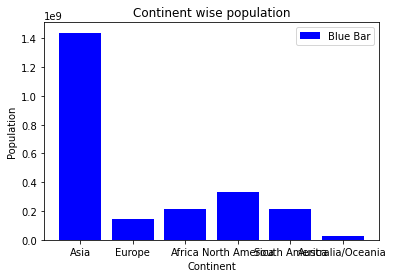

In [ ]:
plt.bar(data.continent,data.population,label="Blue Bar",color="b")
plt.plot()
plt.xlabel('Continent')
plt.ylabel("Population")
plt.title("Continent wise population")

Text(0.5, 1.0, 'Continent wise confirmed cases')

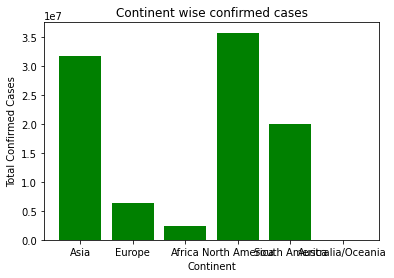

In [ ]:
plt.bar(data.continent,data.total_confirmed,label="Blue Bar",color="g")
plt.xlabel('Continent')
plt.ylabel("Total Confirmed Cases")
plt.title("Continent wise confirmed cases")

Text(0.5, 1.0, 'Continent Wise Recovered Cases')

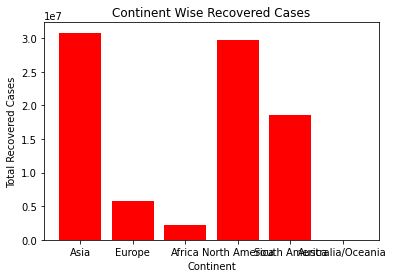

In [ ]:
plt.bar(data.continent,data.total_recovered,color="r")
plt.xlabel("Continent")
plt.ylabel("Total Recovered Cases")
plt.title("Continent Wise Recovered Cases")

Text(0.5, 1.0, 'Continent wise deaths')

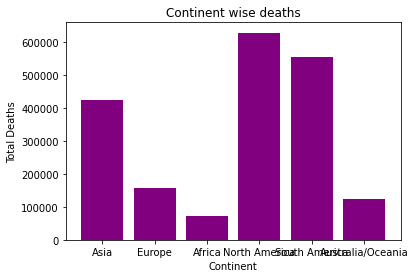

In [ ]:
plt.bar(data.continent,data.total_deaths,color="purple")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.title("Continent wise deaths")

Text(0.5, 1.0, 'Continent wise tests')

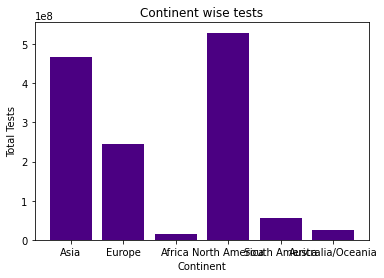

In [ ]:
plt.bar(data.continent,data.total_tests,color="indigo")
plt.xlabel("Continent")
plt.ylabel("Total Tests")
plt.title("Continent wise tests")